[![Contributors][contributors-shield]][contributors-url]
[![Forks][forks-shield]][forks-url]
[![Stargazers][stars-shield]][stars-url]
[![Issues][issues-shield]][issues-url]

<!-- PROJECT LOGO -->
<br />
<div align="center">
  <h2 align="center">Arctic and Antartic ICE Extent - Group D</h2>
  <h3 align="center">Data Visualisation for Data Science for Climate Change</h3>
  <h5 align="center">Université Paris Cité - M2 - Digital Science (AIRE)</h5>

  <p align="center">
  Ranjani A V<br/>
  Sayed Mossavi<br/>
  Dilan Croos
    <br />
    <a href="https://github.com/dilancroos/ice_extent"><strong>Explore the docs »</strong></a>
    <br />
    <br />
    ·
    <a href="https://github.com/dilancroos/ice_extent/issues">Report Bug in GitHub</a>
    ·
    <a href="https://github.com/dilancroos/ice_extent/issues">Request Feature in GitHub</a>
  </p>
</div>

<!-- Markdowncode -->

[contributors-shield]: https://img.shields.io/github/contributors/dilancroos/ice_extent.svg?style=for-the-badge
[contributors-url]: https://github.com/dilancroos/ice_extent/graphs/contributors
[forks-shield]: https://img.shields.io/github/forks/dilancroos/ice_extent.svg?style=for-the-badge
[forks-url]: https://github.com/dilancroos/ice_extent/network/members
[stars-shield]: https://img.shields.io/github/stars/dilancroos/ice_extent.svg?style=for-the-badge
[stars-url]: https://github.com/dilancroos/ice_extent/stargazers
[issues-shield]: https://img.shields.io/github/issues/dilancroos/ice_extent.svg?style=for-the-badge
[issues-url]: https://github.com/dilancroos/ice_extent/issues

In [1]:
# Importing libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pathlib

from watermark import watermark
import requests
import zipfile

/Users/dilancroos/LPI/Study_Meterial/Data_science_for_climate_change/Class2/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
print(watermark())

Last updated: 2024-03-08T02:15:48.942340+01:00

Python implementation: CPython
Python version       : 3.9.6
IPython version      : 8.18.1

Compiler    : Clang 15.0.0 (clang-1500.3.9.4)
OS          : Darwin
Release     : 23.3.0
Machine     : arm64
Processor   : arm
CPU cores   : 10
Architecture: 64bit



In [3]:
print(watermark(iversions=True, globals_=globals()))

numpy     : 1.26.4
matplotlib: 3.8.3
requests  : 2.31.0
pandas    : 2.2.1



# Part One : Arctic Ice Extent 

The goal is to plot the below graphs by NSIDC (National Snow and Ice Data Center) using the arctic and antarctic sea ice level. The data was available at NSIDC (National Snow and Ice Data Center) which is a part of the University of Colorado Boulder.

Analyzing the Ice Extent from 1979 to 2023 and plotting the  trend of ice extent over time. The Data is from 1978 - 2024,but we have removed 1978 and 2024 as there are only two months in 1978 and  one month in 2024 which makes it unsuitable for analysis.

<center><img src="img.jpg" alt="Sea Ice Index" width="600" height="400"></center>

The data was in CSV (Comma Seperate Value) format and consisted of the following columns:
<center>

|Year|Month|Day|Extent|Missing|Source Data|
|---|---|---|---|---|---|
|YYYY|MM|DD|10^6 sq km|10^6 sq km|Source data product web sites|

</center>

We are interested in the columns: 
<center>

|Year|Month|Day|Extent|
|---|---|---|---|
|YYYY|MM|DD|10^6 sq km|10^6 sq km|

</center>

## Data Transformation 
<ol>
<li>  Dropping the Source Data column
 <li> Dropping the first row (YYYY, MM, DD, 10^6 sq km	10^6 sq km, 	Source data product web sites: http://nsidc.o...)  as it is not necessary for our analysis.
<li> Converting Year to a numerical data type (int)
<li> Group the DataFrame by the 'year' column.
<li> Calculate the mean of the 'Extent' column for each year.
<li> Reset the DataFrame index, Set the 'year' column as the new index.
<li> Changing the "Year", "Month", "Day" into date and time format
</ol>

### Link

Arctic = https://noaadata.apps.nsidc.org/NOAA/G02135/north/daily/data/N_seaice_extent_daily_v3.0.csv

## Loading the Arctic data

In [4]:
# if Datasets directory is not available, create it
pathlib.Path("Datasets").mkdir(exist_ok=True)

# check the files in the Datasets directory
path = pathlib.Path("Datasets")
files = [file.name for file in path.iterdir()]
if "N_seaice_extent_daily_v3.0.csv" in files:
    print("The data is available")
else:
    # if not available download the data
    url = "https://noaadata.apps.nsidc.org/NOAA/G02135/north/daily/data/N_seaice_extent_daily_v3.0.csv"
    r = requests.get(url)
    with open("Datasets/N_seaice_extent_daily_v3.0.csv", "wb") as f:
        f.write(r.content)


The data is available


### Reading the data in csv format 

In [5]:
# Display the data
n_seaice = pd.read_csv('Datasets/N_seaice_extent_daily_v3.0.csv', header=0)
n_seaice.head(10)

,Year,Month,Day,Extent,Missing,Source Data
0,YYYY,MM,DD,10^6 sq km,10^6 sq km,Source data product web sites: http://nsidc.o...
1,1978,10,26,10.231,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
2,1978,10,28,10.420,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
3,1978,10,30,10.557,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
4,1978,11,01,10.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...
5,1978,11,03,10.777,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.03/nt_19...
6,1978,11,05,10.968,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.05/nt_19...
7,1978,11,07,11.080,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.07/nt_19...
8,1978,11,09,11.189,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.09/nt_19...
9,1978,11,11,11.314,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.11/nt_19...


### Exploring the data 



In [6]:
# Columns name 
n_seaice.columns

Index(['Year', ' Month', ' Day', '     Extent', '    Missing', ' Source Data'], dtype='object')

### Converting Column Names

In [7]:
# rename the columns
n_seaice.columns = ['Year', 'Month', 'Day', 'Extent', 'Missing', 'Source Data']
n_seaice.columns

Index(['Year', 'Month', 'Day', 'Extent', 'Missing', 'Source Data'], dtype='object')

### Dropping the ['Source Data'], and the first Row of the data

In [8]:
# Dropping the Source Data colunm
n_seaice_clean =(n_seaice
                 .drop(['Source Data'], axis=1)
                 .drop([0], axis=0)
                 )
n_seaice_clean.head()

,Year,Month,Day,Extent,Missing
1,1978,10,26,10.231,0.000
2,1978,10,28,10.420,0.000
3,1978,10,30,10.557,0.000
4,1978,11,01,10.670,0.000
5,1978,11,03,10.777,0.000


In [9]:
# Explor the data shape
n_seaice_clean.shape

(14905, 5)

In [10]:
# Basic information about the data set
n_seaice_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14905 entries, 1 to 14905
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     14905 non-null  object
 1   Month    14905 non-null  object
 2   Day      14905 non-null  object
 3   Extent   14905 non-null  object
 4   Missing  14905 non-null  object
dtypes: object(5)
memory usage: 582.4+ KB


### Converting the interested columns into integer format, since all the cols are in object format.

In [11]:
# Change the Year, Month, Day, Missing and Extent columns to integers
n_seaice_clean['Year'] = n_seaice_clean['Year'].astype(int)
n_seaice_clean['Month'] = n_seaice_clean['Month'].astype(int)
n_seaice_clean['Day'] = n_seaice_clean['Day'].astype(int)
n_seaice_clean['Extent'] = n_seaice_clean['Extent'].astype(float)
n_seaice_clean['Missing'] = n_seaice_clean['Missing'].astype(float)

# Create a new column called Date and get the date from the Year, Month and Day columns
n_seaice_clean['Date'] = pd.to_datetime(n_seaice_clean[['Year', 'Month', 'Day']])
n_seaice_clean.head()

,Year,Month,Day,Extent,Missing,Date
1,1978,10,26,10.231,0.0,1978-10-26
2,1978,10,28,10.420,0.0,1978-10-28
3,1978,10,30,10.557,0.0,1978-10-30
4,1978,11,1,10.670,0.0,1978-11-01
5,1978,11,3,10.777,0.0,1978-11-03


In [12]:
# Basic information about the data afer converting the Year colunm to float and dropping unnecessary cols
n_seaice_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14905 entries, 1 to 14905
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Year     14905 non-null  int64         
 1   Month    14905 non-null  int64         
 2   Day      14905 non-null  int64         
 3   Extent   14905 non-null  float64       
 4   Missing  14905 non-null  float64       
 5   Date     14905 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 698.8 KB


In [13]:
# Data Describtion 
n_seaice_clean.describe()

,Year,Month,Day,Extent,Missing,Date
count,14905.000000,14905.000000,14905.000000,14905.000000,14905.0,14905
mean,2002.988796,6.526669,15.734586,11.233564,0.0,2003-06-28 06:35:08.554176384
min,1978.000000,1.000000,1.000000,3.340000,0.0,1978-10-26 00:00:00
25%,1993.000000,4.000000,8.000000,8.475000,0.0,1993-07-16 00:00:00
50%,2003.000000,7.000000,16.000000,11.969000,0.0,2003-09-28 00:00:00
75%,2013.000000,10.000000,23.000000,14.159000,0.0,2013-12-10 00:00:00
max,2024.000000,12.000000,31.000000,16.635000,0.0,2024-02-22 00:00:00
std,12.207257,3.455468,8.800672,3.316977,0.0,NaN


### Grouping  data by Year and get the mean

In [14]:
# Groupby year the data, and get the mean
n_seaice_grouped = n_seaice_clean.groupby(['Year']).mean()
n_seaice_grouped.head()

,Month,Day,Extent,Missing,Date
Year,,,,,
1978,11.382353,16.617647,12.487000,0.0,1978-11-28
1979,6.527473,15.681319,12.319560,0.0,1979-07-02
1980,6.497268,15.759563,12.334148,0.0,1980-07-01
1981,6.524590,15.759563,12.135486,0.0,1981-07-02
1982,6.527473,15.681319,12.439445,0.0,1982-07-02


### Getting the min and max year 

In [15]:
# Min & Max year 
yearMin = n_seaice_grouped.index.min()
yearMax = n_seaice_grouped.index.max()
print(yearMin)
print(yearMax)

1978
2024


### Dropping the min and max  (1978 & 2024), and the reason is explained in the beginning of the notebook.

In [16]:
# remove the first year and the last year
n_seaice_grouped = n_seaice_grouped.drop([yearMin, yearMax])

### Plotting the arctic  sea ice extent

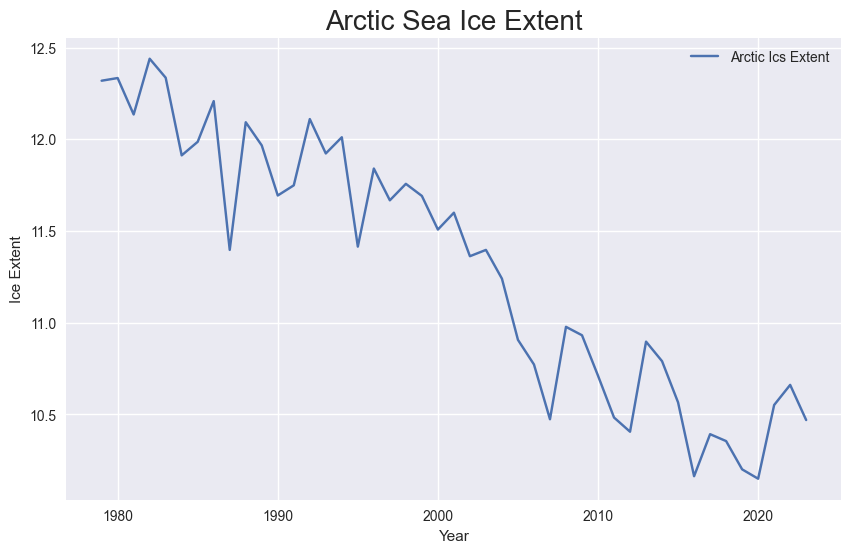

In [17]:
# plot the data
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 6))
plt.plot(n_seaice_grouped['Extent'], label='Arctic Ics Extent')
plt.xlabel('Year')
plt.ylabel('Ice Extent')
plt.title('Arctic Sea Ice Extent', fontsize=20)
plt.legend()
plt.show()


### Adding a regression line

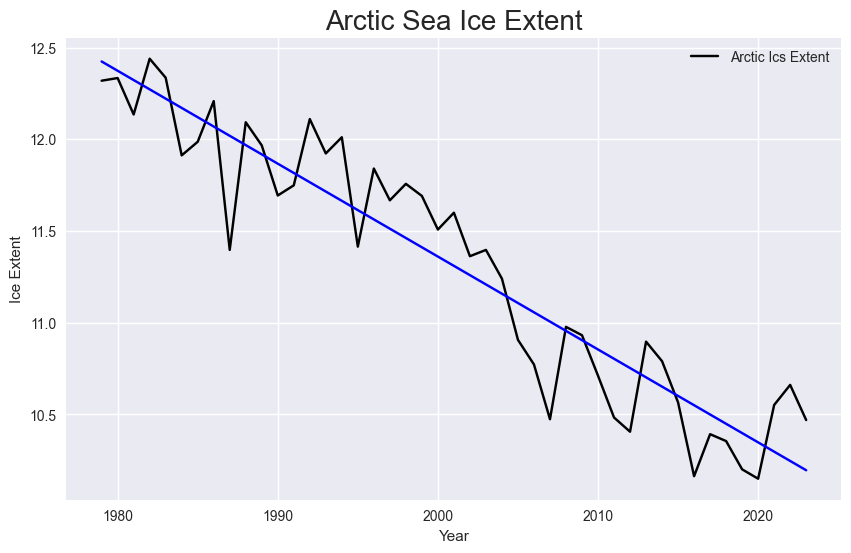

In [18]:
# Add regression line
# plot the data
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 6))
plt.plot(n_seaice_grouped['Extent'], label='Arctic Ics Extent', color='black')
plt.xlabel('Year')
plt.ylabel('Ice Extent')
plt.title('Arctic Sea Ice Extent', fontsize=20)
plt.legend()

# Add regression line
z = np.polyfit(n_seaice_grouped.index, n_seaice_grouped['Extent'], 1)
p = np.poly1d(z)
plt.plot(n_seaice_grouped.index, p(n_seaice_grouped.index), "b-")
plt.show()


# Part Two: Antarctic Ice Extent

The data was in CSV (Comma Seperate Value) format and consisted of the following columns:
<center>

|Year|Month|Day|Extent|Missing|Source Data|
|---|---|---|---|---|---|
|YYYY|MM|DD|10^6 sq km|10^6 sq km|Source data product web sites|

</center>

We are interested in the columns: 
<center>

|Year|Month|Day|Extent|
|---|---|---|---|
|YYYY|MM|DD|10^6 sq km|10^6 sq km|

</center>

### Link

Antarctic = https://noaadata.apps.nsidc.org/NOAA/G02135/south/daily/data/S_seaice_extent_daily_v3.0.csv

### Loading the Antarctic data

In [19]:
# if the data is not available, download it

# check the files in the Datasets directory
path = pathlib.Path("Datasets")
files = [file.name for file in path.iterdir()]
if "S_seaice_extent_daily_v3.0.csv" in files:
    print("The data is available")
else:
    # if not available download the data
    url = "https://noaadata.apps.nsidc.org/NOAA/G02135/south/daily/data/S_seaice_extent_daily_v3.0.csv"
    r = requests.get(url)
    with open("Datasets/S_seaice_extent_daily_v3.0.csv", "wb") as f:
        f.write(r.content)



The data is available


### Reading the data in csv format

In [20]:
s_seaice = pd.read_csv ('Datasets/S_seaice_extent_daily_v3.0.csv', header=0)

s_seaice.head()

,Year,Month,Day,Extent,Missing,Source Data
0,YYYY,MM,DD,10^6 sq km,10^6 sq km,Source data product web sites: http://nsidc.o...
1,1978,10,26,17.624,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
2,1978,10,28,17.803,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
3,1978,10,30,17.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
4,1978,11,01,17.527,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...


### Exploring the data

In [21]:
# Name of the columns
s_seaice.columns

Index(['Year', ' Month', ' Day', '     Extent', '    Missing', ' Source Data'], dtype='object')

### Converting Column Names

In [22]:
# rename the columns
s_seaice.columns = ['Year', 'Month', 'Day', 'Extent', 'Missing', 'Source Data']

### Dropping the column ['Source Data'], and the first Row of the data

In [23]:
# Dropping the cloumn (Soure Data)
s_seaice_clean = (s_seaice
                  .drop(['Source Data'], axis =1)
                  .drop([0], axis=0))
s_seaice_clean.head()

,Year,Month,Day,Extent,Missing
1,1978,10,26,17.624,0.000
2,1978,10,28,17.803,0.000
3,1978,10,30,17.670,0.000
4,1978,11,01,17.527,0.000
5,1978,11,03,17.486,0.000


In [24]:
# Shape of the data
s_seaice_clean.shape

(14905, 5)

In [25]:
# Types of the data 
s_seaice_clean.dtypes

Year       object
Month      object
Day        object
Extent     object
Missing    object
dtype: object

### Converting the interested columns into integer format, since all the cols are in object format.

In [26]:
# Change the Year, Month and Day columns to integers
s_seaice_clean['Year'] = s_seaice_clean['Year'].astype(int)
s_seaice_clean['Month'] = s_seaice_clean['Month'].astype(int)
s_seaice_clean['Day'] = s_seaice_clean['Day'].astype(int)
s_seaice_clean['Extent'] = s_seaice_clean['Extent'].astype(float)
s_seaice_clean['Missing'] = s_seaice_clean['Missing'].astype(float)

# Create a new column called Date and get the date from the Year, Month and Day columns
s_seaice_clean['Date'] = pd.to_datetime(s_seaice_clean[['Year', 'Month', 'Day']])
s_seaice_clean.head()

,Year,Month,Day,Extent,Missing,Date
1,1978,10,26,17.624,0.0,1978-10-26
2,1978,10,28,17.803,0.0,1978-10-28
3,1978,10,30,17.670,0.0,1978-10-30
4,1978,11,1,17.527,0.0,1978-11-01
5,1978,11,3,17.486,0.0,1978-11-03


### Grouping  data by Year and get the mean

In [27]:
s_seaice_grouped = s_seaice_clean.groupby(['Year']).mean()
s_seaice_grouped.tail() 

,Month,Day,Extent,Missing,Date
Year,,,,,
2020,6.513661,15.756831,11.602402,0.000000,2020-07-01 12:00:00.000000000
2021,6.526027,15.720548,11.578682,0.000000,2021-07-02 00:00:00.000000000
2022,6.526027,15.720548,10.726003,0.000000,2022-07-01 23:59:59.999999744
2023,6.526027,15.720548,9.852699,0.000164,2023-07-02 00:00:00.000000000
2024,1.415094,14.132075,3.199000,0.004472,2024-01-27 00:00:00.000000000


### Getting the min and max year 

In [28]:
yearMin = s_seaice_grouped.index.min()
yearMax = s_seaice_grouped.index.max()
print(yearMin)
print(yearMax)

1978
2024


### Dropping the min and max  (1978 & 2024), and the reason is explained in the beginning of the notebook.

In [29]:
# remove 1978 and 2024
s_seaice_grouped = s_seaice_grouped.drop([yearMin, yearMax])

In [30]:
s_seaice_grouped.tail()

,Month,Day,Extent,Missing,Date
Year,,,,,
2019,6.526027,15.720548,10.876060,0.000000,2019-07-02 00:00:00.000000000
2020,6.513661,15.756831,11.602402,0.000000,2020-07-01 12:00:00.000000000
2021,6.526027,15.720548,11.578682,0.000000,2021-07-02 00:00:00.000000000
2022,6.526027,15.720548,10.726003,0.000000,2022-07-01 23:59:59.999999744
2023,6.526027,15.720548,9.852699,0.000164,2023-07-02 00:00:00.000000000


### Plotting the arctic  sea ice extent

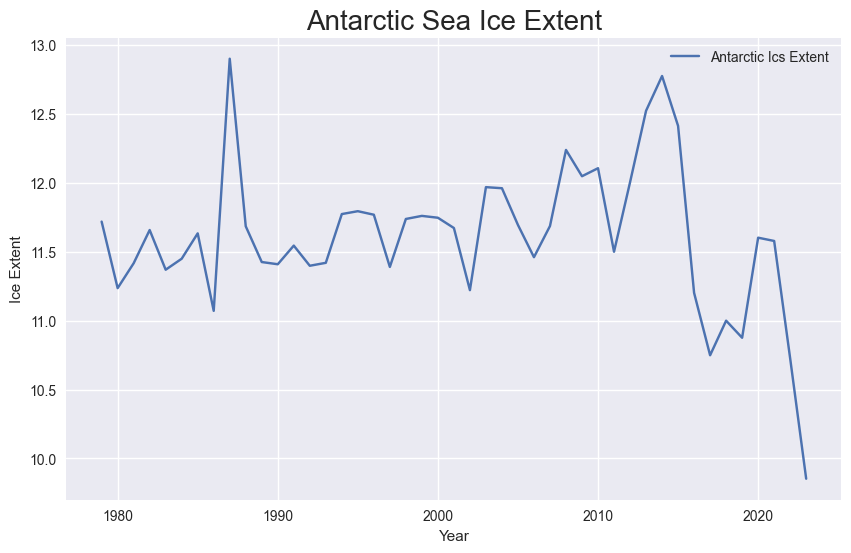

In [31]:
# plot the rolling mean of the sea ice extent

# plot the data
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10,6))
plt.plot(s_seaice_grouped['Extent'], label='Antarctic Ics Extent')
plt.xlabel('Year')
plt.ylabel('Ice Extent')
plt.title('Antarctic Sea Ice Extent', fontsize=20)
plt.legend()
plt.show()

### Adding a regression line

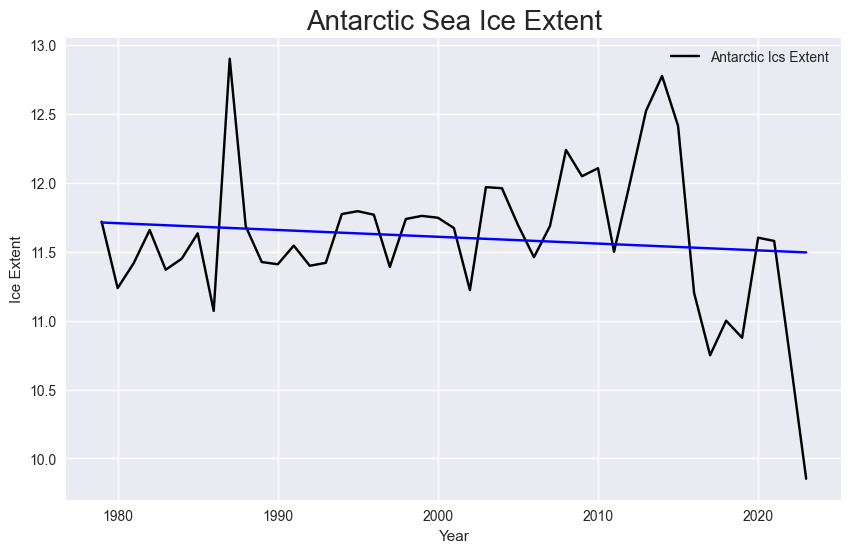

In [32]:
# Add regression line
# plot the data
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 6))
plt.plot(s_seaice_grouped['Extent'], label='Antarctic Ics Extent', color='black')
plt.xlabel('Year')
plt.ylabel('Ice Extent')
plt.title('Antarctic Sea Ice Extent', fontsize=20)
plt.legend()

# Add regression line
z = np.polyfit(s_seaice_grouped.index, s_seaice_grouped['Extent'], 1)
p = np.poly1d(z)
plt.plot(s_seaice_grouped.index, p(s_seaice_grouped.index), "b-")
plt.show()


# Plotting together the Arctic & Antarctic sea ice extent 

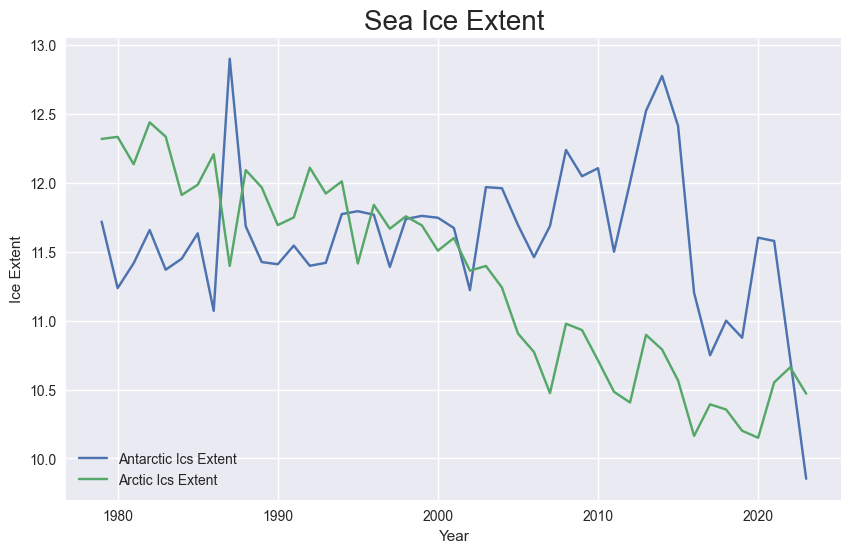

In [33]:
# plot the arctic and antarctic ice extent in one plot

# plot the data
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10,6))
plt.plot(s_seaice_grouped['Extent'], label='Antarctic Ics Extent')
plt.plot(n_seaice_grouped['Extent'], label='Arctic Ics Extent')
plt.xlabel('Year')
plt.ylabel('Ice Extent')
plt.title('Sea Ice Extent', fontsize=20)
plt.legend()
plt.show()


### Plotting together the Arctic & Antarctic sea ice extent, and adding the regression line

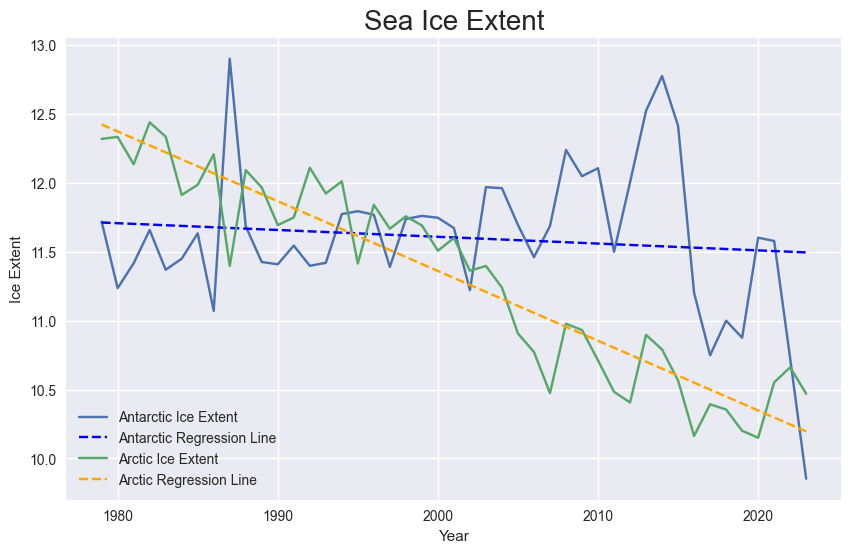

In [34]:
# Fit a linear regression line for Antarctic ice extent
x_antarctic = np.arange(len(s_seaice_grouped['Extent']))
y_antarctic = s_seaice_grouped['Extent']
coefficients_antarctic = np.polyfit(x_antarctic, y_antarctic, 1)
poly_line_antarctic = np.poly1d(coefficients_antarctic)

# Fit a linear regression line for Arctic ice extent
x_arctic = np.arange(len(n_seaice_grouped['Extent']))
y_arctic = n_seaice_grouped['Extent']
coefficients_arctic = np.polyfit(x_arctic, y_arctic, 1)
poly_line_arctic = np.poly1d(coefficients_arctic)

# Assuming you have already calculated y_antarctic and y_arctic
# Plotting
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10,6))

# Plot Antarctic sea ice extent and regression line
plt.plot(s_seaice_grouped.index, y_antarctic, label='Antarctic Ice Extent')
plt.plot(s_seaice_grouped.index, poly_line_antarctic(x_antarctic), label='Antarctic Regression Line', color='blue', linestyle='--')

# Plot Arctic sea ice extent and regression line
plt.plot(n_seaice_grouped.index, y_arctic, label='Arctic Ice Extent')
plt.plot(n_seaice_grouped.index, poly_line_arctic(x_arctic), label='Arctic Regression Line', color='orange', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Ice Extent')
plt.title('Sea Ice Extent', fontsize=20)
plt.legend()
plt.show()

# Part Three: Global Mean Sea Level

The data for GMSL is from two sources:
1. US Environmental Protection Agency, from 1880-2014. The data is monthly, instead of daily. It is recorded on the 15th of every month.
This data contains cumulative changes in sea level for the world’s oceans since 1880, based on a combination of long-term tide gauge measurements and recent satellite measurements.
The columns are: 

<center>

|Time|GMSL|
|---|---|
|Date|Global Mean Sea Level|

</center>

2. European Environment Agency, from 1993-2022. The data obtained is daily. The columns are: 

<center>

|Year|Global mean sea level (ensemble, Palmer et al., 2021)|Global mean sea level (satellite altimeter, CMEMS)|
|---|---|---|

</center>

We intend to observe the change in sea level over the years and evaluate the consistency of the the two data sets.

### US Environmental Protection Agency GMSL Data

In [35]:
# check the files in the Datasets directory
path = pathlib.Path("Datasets")
files = [file.name for file in path.iterdir()]
if "sea-level-rise_zip.zip" in files:
    print("The data is available")

else:
    # read the data
    url = "https://datahub.io/core/sea-level-rise/r/sea-level-rise_zip.zip"
    r = requests.get(url)
    with open("Datasets/sea-level-rise_zip.zip", "wb") as f:
        f.write(r.content)

    # unzip the file
    with zipfile.ZipFile("Datasets/sea-level-rise_zip.zip", 'r') as zip_ref:
        zip_ref.extractall("Datasets/sea-level-rise")



The data is available


### Reading the data in csv format

In [36]:
# read the sea level data

sea_level = pd.read_csv('Datasets/sea-level-rise/data/csiro_alt_gmsl_mo_2015_csv.csv', header=0)
sea_level.head()

,Time,GMSL
0,1993-01-15,-1.6
1,1993-02-15,-3.4
2,1993-03-15,5.5
3,1993-04-15,0.1
4,1993-05-15,5.3


In [37]:
sea_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    266 non-null    object 
 1   GMSL    266 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB


### Converting the time column (Time) to a date format

In [38]:
# convert the time column to datetime

sea_level['Time'] = pd.to_datetime(sea_level['Time'])
sea_level.head()

,Time,GMSL
0,1993-01-15,-1.6
1,1993-02-15,-3.4
2,1993-03-15,5.5
3,1993-04-15,0.1
4,1993-05-15,5.3


In [39]:
sea_level.describe()

,Time,GMSL
count,266,266.000000
mean,2004-01-29 21:44:39.699248128,36.028571
min,1993-01-15 00:00:00,-3.500000
25%,1998-07-22 18:00:00,20.525000
50%,2004-01-30 12:00:00,36.700000
75%,2009-08-07 06:00:00,52.500000
max,2015-02-15 00:00:00,79.500000
std,NaN,20.889803


### Grouping the data by Time (Year) and getting the mean

In [40]:
# group by year and get the mean

sea_level_grouped = sea_level.groupby(sea_level['Time'].dt.year).mean()
sea_level_grouped.head()

,Time,GMSL
Time,,
1993,1993-06-30 12:00:00,1.408333
1994,1994-06-30 12:00:00,2.733333
1995,1995-06-30 12:00:00,5.750000
1996,1996-06-30 08:00:00,11.341667
1997,1997-06-30 12:00:00,16.050000


In [41]:
sea_level_grouped['GMSL in cm'] = sea_level_grouped['GMSL'].apply(lambda x: x/10)
sea_level_grouped.head()

,Time,GMSL,GMSL in cm
Time,,,
1993,1993-06-30 12:00:00,1.408333,0.140833
1994,1994-06-30 12:00:00,2.733333,0.273333
1995,1995-06-30 12:00:00,5.750000,0.575000
1996,1996-06-30 08:00:00,11.341667,1.134167
1997,1997-06-30 12:00:00,16.050000,1.605000


### Plotting the US EPA Global Mean Sea Level (GMSL)

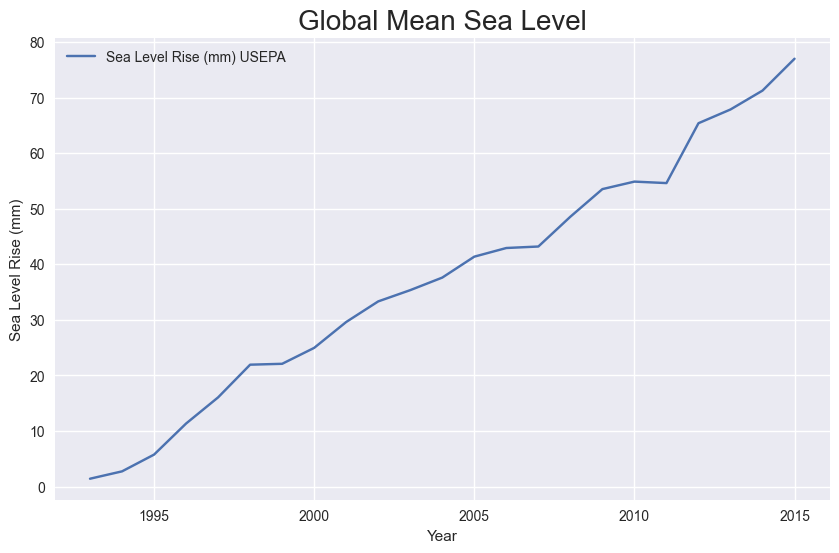

In [42]:
# plot the data

plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10,6))
plt.plot(sea_level_grouped['GMSL'], label='Sea Level Rise (mm) USEPA')
plt.xlabel('Year')
plt.ylabel('Sea Level Rise (mm)')
plt.title('Global Mean Sea Level', fontsize=20)
plt.legend()
plt.show()


### EU Environment Agency GMSL Data

In [43]:
# check the files in the Datasets directory
path = pathlib.Path("Datasets")
files = [file.name for file in path.iterdir()]
if "Data-package.zip" in files:
    print("The data is available")

else:
    # read the data
    url = "https://www.eea.europa.eu/data-and-maps/figures/observed-change-in-global-mean-3/data-package.zip/at_download/file"
    r = requests.get(url)
    with open("Datasets/Data-package.zip", "wb") as f:
        f.write(r.content)

    # unzip the file
    with zipfile.ZipFile("Datasets/Data-package.zip", 'r') as zip_ref:
        zip_ref.extractall("Datasets/sea-level-rise/Data-package")



The data is available


In [44]:
# read the sea level data from FIG1a_259008_CLIM012-v4-Data.xlsx file and get the data from the Original Data 3 tab

sea_level_eea = pd.read_excel('Datasets/sea-level-rise/Data-package/FIG1a_259008_CLIM012-v4-Data.xlsx', sheet_name='Original Data 3', header=0)
sea_level_eea.head()

,Year,"Global mean sea level (ensemble, Palmer et al., 2021)","Global mean sea level (satellite altimeter, CMEMS)"
0,1900,-148.467482,NaN
1,1901,-146.753115,NaN
2,1902,-148.321435,NaN
3,1903,-142.164056,NaN
4,1904,-144.403691,NaN


In [45]:
sea_level_eea.tail(15)

,Year,"Global mean sea level (ensemble, Palmer et al., 2021)","Global mean sea level (satellite altimeter, CMEMS)"
113,2013,NaN,3.579853e+01
114,2014,NaN,3.861068e+01
115,2015,NaN,4.803357e+01
116,2016,NaN,5.180764e+01
117,2017,NaN,5.310659e+01
118,2018,NaN,5.690186e+01
119,2019,NaN,6.320915e+01
120,2020,NaN,6.628079e+01
121,2021,NaN,7.093695e+01
122,2022,NaN,7.355689e+01


In [46]:
# remove last 5 rows

sea_level_eea = sea_level_eea.iloc[:-5]
sea_level_eea.tail(10)

,Year,"Global mean sea level (ensemble, Palmer et al., 2021)","Global mean sea level (satellite altimeter, CMEMS)"
113,2013,NaN,35.798526
114,2014,NaN,38.610678
115,2015,NaN,48.033565
116,2016,NaN,51.807641
117,2017,NaN,53.106594
118,2018,NaN,56.901858
119,2019,NaN,63.209152
120,2020,NaN,66.280787
121,2021,NaN,70.936955
122,2022,NaN,73.556886


In [47]:
sea_level_eea.columns

Index(['Year', 'Global mean sea level (ensemble, Palmer et al., 2021)',
       'Global mean sea level (satellite altimeter, CMEMS) '],
      dtype='object')

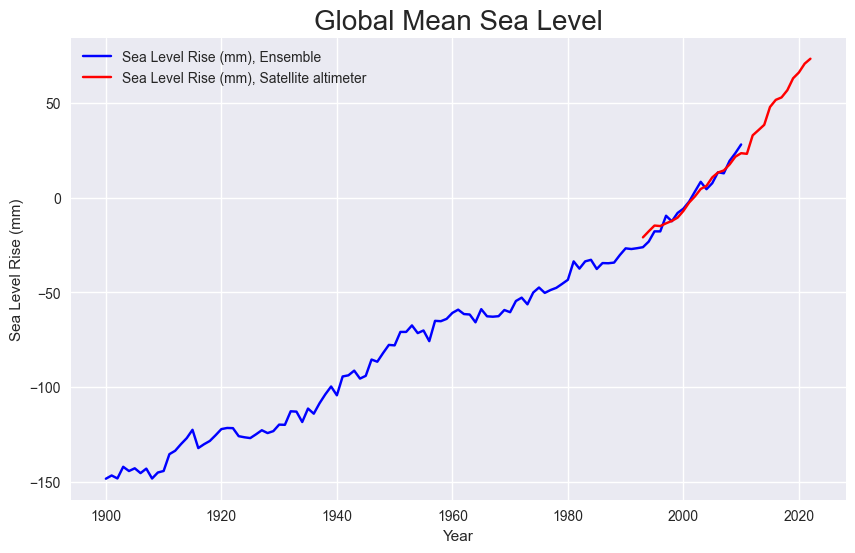

In [48]:
# plot the data

plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10,6))
plt.plot(sea_level_eea['Year'], sea_level_eea['Global mean sea level (ensemble, Palmer et al., 2021)'], label='Sea Level Rise (mm), Ensemble', color='blue')
plt.plot(sea_level_eea['Year'], sea_level_eea['Global mean sea level (satellite altimeter, CMEMS) '], label='Sea Level Rise (mm), Satellite altimeter', color='red')
plt.xlabel('Year')
plt.ylabel('Sea Level Rise (mm)')
plt.title('Global Mean Sea Level', fontsize=20)
plt.legend()
plt.show()

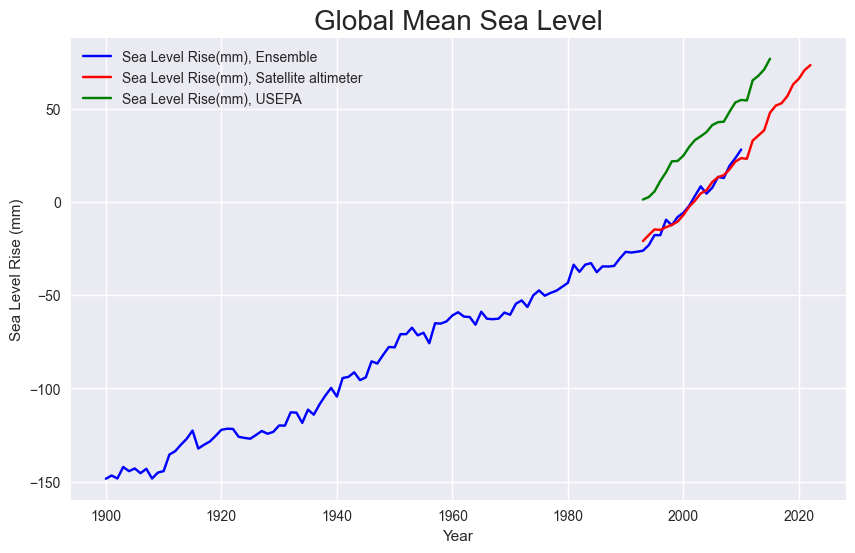

In [49]:
# plot Us sea level rise and EU sea level rise in one plot

# plot the data
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10,6))
plt.plot(sea_level_eea['Year'], sea_level_eea['Global mean sea level (ensemble, Palmer et al., 2021)'], label='Sea Level Rise(mm), Ensemble', color='blue')
plt.plot(sea_level_eea['Year'], sea_level_eea['Global mean sea level (satellite altimeter, CMEMS) '], label='Sea Level Rise(mm), Satellite altimeter', color='red')
plt.plot(sea_level_grouped.index, sea_level_grouped['GMSL'], label='Sea Level Rise(mm), USEPA', color='green')
plt.xlabel('Year')
plt.ylabel('Sea Level Rise (mm)')
plt.title('Global Mean Sea Level', fontsize=20)
plt.legend()
plt.show()

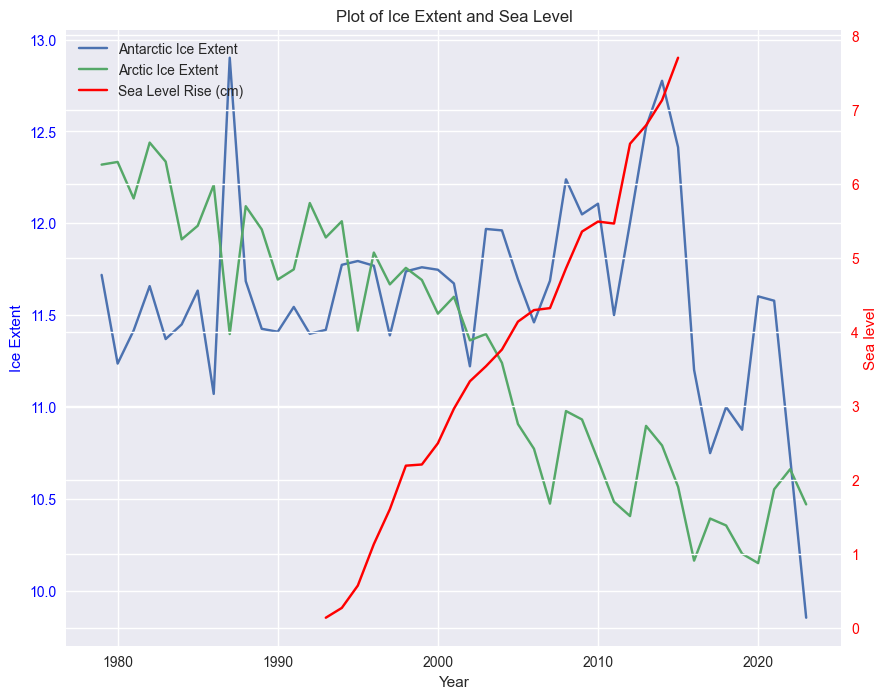

In [50]:
# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 8))

# Plot y1 on the left y-axis
#ax1.plot(x, y1, color='blue', label='y1 = 100 + x^2')
ax1.plot(s_seaice_grouped['Extent'], label='Antarctic Ice Extent')
ax1.plot(n_seaice_grouped['Extent'], label='Arctic Ice Extent')
ax1.set_xlabel('Year')
ax1.set_ylabel('Ice Extent', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot y2 on the right y-axis
#ax2.plot(x, y2, color='red', label='y2 = 100 - x')
ax2.plot(sea_level_grouped['GMSL in cm'], label='Sea Level Rise (cm)', color='red')
ax2.set_ylabel('Sea level', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

# Add title
plt.title('Plot of Ice Extent and Sea Level')

# Show the plot
plt.grid(True)
plt.show()

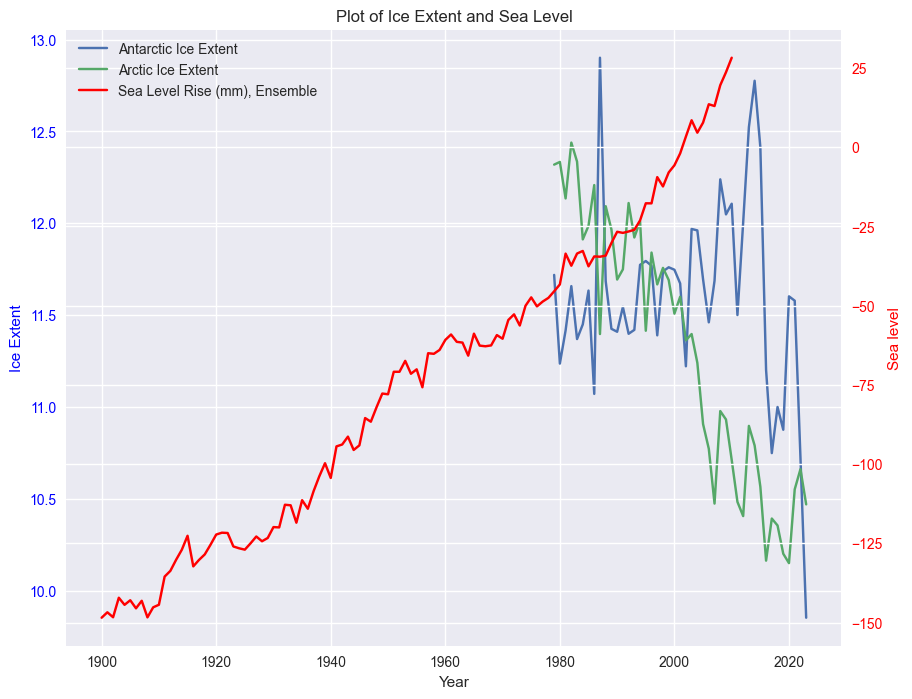

In [51]:
# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 8))

# Plot y1 on the left y-axis
ax1.plot(s_seaice_grouped['Extent'], label='Antarctic Ice Extent')
ax1.plot(n_seaice_grouped['Extent'], label='Arctic Ice Extent')
ax1.set_xlabel('Year')
ax1.set_ylabel('Ice Extent', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot y2 on the right y-axis
ax2.plot(sea_level_eea['Year'], sea_level_eea['Global mean sea level (ensemble, Palmer et al., 2021)'], label='Sea Level Rise (mm), Ensemble', color='red')
ax2.set_ylabel('Sea level', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

# Add title
plt.title('Plot of Ice Extent and Sea Level')

# Show the plot
plt.grid(True)
plt.show()